In [8]:
import pandas as pd
import numpy as np
from prophet import Prophet


c:\Users\jason\anaconda3\envs\playground\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:

# Load your dataset
df = pd.read_csv("data/rm-yields-data.csv")

In [39]:
data = df[df['RM'] == 1]

In [40]:
data.head()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.0,NaN,NaN,NaN,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.0,NaN,NaN,NaN,32.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.0,NaN,NaN,NaN,35.0,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN


In [41]:
data.shape

(84, 18)

In [42]:
#drop the RM column
#data = data.drop(['RM'], axis=1)

In [25]:
# Transform the data type of the Year column in the rm_crop_yields to datetime
#data['Year'] = pd.to_datetime(data['Year'], format='%Y', infer_datetime_format = True)

# in the Year column, extract the year and store it in a new column called Year
#data['Year'] = data['Year'].dt.year

C:\Users\jason\AppData\Local\Temp\ipykernel_4336\952349901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = pd.to_datetime(data['Year'], format='%Y', infer_datetime_format = True)
C:\Users\jason\AppData\Local\Temp\ipykernel_4336\952349901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Year'].dt.year


In [44]:
# Prepare the dataset for Prophet
def prepare_data(column_name):
    df = data[['Year', 'RM', column_name]].dropna()
    df = df.rename(columns={'Year': 'ds', column_name: 'y'})
    return df

def train_and_predict(column_name):
    df = prepare_data(column_name)
    model = Prophet()
    
    # Add the RM data as an additional regressor
    model.add_regressor('RM')
    
    model.fit(df)
    
    # Create future dataframe with RM data
    future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})
    future_RM = data[['Year', 'RM']].drop_duplicates().tail(5)
    future_RM['Year'] = pd.to_datetime(future_RM['Year'].astype(str), format='%Y')
    future_years['RM'] = future_RM['RM'].values
    
    # Ensure 'Year' values are datetime objects
    df['ds'] = pd.to_datetime(df['ds'].astype(str), format='%Y')
    
    future = pd.concat([df[['ds', 'RM']], future_years], ignore_index=True)
    
    forecast = model.predict(future)
    return forecast

# Forecast the next 5 years for each column
predictions = {}
for column in data.columns[2:]:
    prepared_data = prepare_data(column)
    if prepared_data.shape[0] >= 2:
        print(f"Predicting {column}...")
        predictions[column] = train_and_predict(column)
    else:
        print(f"Not enough data for {column}. Skipping...")

# Save predictions to CSV files
for column, prediction in predictions.items():
    prediction.to_csv(f"{column}_predictions.csv", index=False)



14:10:10 - cmdstanpy - INFO - Chain [1] start processing
14:10:10 - cmdstanpy - INFO - Chain [1] done processing


Predicting Winter Wheat...
Predicting Canola...


C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})
14:10:10 - cmdstanpy - INFO - Chain [1] start processing
14:10:10 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})
14:10:10 - cmdstanpy - INFO - Chain [1] start processing


Predicting Spring Wheat...


14:10:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})
14:10:11 - cmdstanpy - INFO - Chain [1] start processing
14:10:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})


Predicting Mustard...
Predicting Durum...


14:10:11 - cmdstanpy - INFO - Chain [1] start processing
14:10:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})
14:10:11 - cmdstanpy - INFO - Chain [1] start processing
14:10:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})


Predicting Sunflowers...
Predicting Oats...


14:10:11 - cmdstanpy - INFO - Chain [1] start processing
14:10:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})
14:10:11 - cmdstanpy - INFO - Chain [1] start processing
14:10:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})
14:10:12 - cmdstanpy - INFO - Chain [1] start processing


Predicting Lentils...
Predicting Peas...


14:10:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})
14:10:12 - cmdstanpy - INFO - Chain [1] start processing
14:10:12 - cmdstanpy - INFO - Chain [1] done processing


Predicting Barley...


C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})
14:10:12 - cmdstanpy - INFO - Chain [1] start processing


Predicting Fall Rye...


14:10:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})
14:10:12 - cmdstanpy - INFO - Chain [1] start processing
14:10:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})


Predicting Canary Seed...
Predicting Spring Rye...


C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})
14:10:13 - cmdstanpy - INFO - Chain [1] start processing
14:10:13 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})


Predicting Tame Hay...
Predicting Flax...


14:10:13 - cmdstanpy - INFO - Chain [1] start processing
14:10:13 - cmdstanpy - INFO - Chain [1] done processing


Not enough data for Chickpeas. Skipping...


C:\Users\jason\AppData\Local\Temp\ipykernel_4336\2355190699.py:17: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})


In [73]:
df_canola_588 = pd.read_csv("Canola_predictions.csv")
df_barley_588 = pd.read_csv("Barley_predictions.csv")
df_oats_1 = pd.read_csv("Oats_predictions.csv")

In [74]:
df_oats_1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,RM,RM_lower,RM_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1938-01-01,53.632278,0.066037,37.175025,53.632278,53.632278,214.661574,214.661574,214.661574,-35.521913,...,214.661574,214.661574,214.661574,-250.183487,-250.183487,-250.183487,0.0,0.0,0.0,18.110366
1,1939-01-01,54.298818,-1.967084,35.161320,54.298818,54.298818,214.661574,214.661574,214.661574,-37.203231,...,214.661574,214.661574,214.661574,-251.864805,-251.864805,-251.864805,0.0,0.0,0.0,17.095587
2,1940-01-01,54.965357,-2.154161,35.665773,54.965357,54.965357,214.661574,214.661574,214.661574,-37.494496,...,214.661574,214.661574,214.661574,-252.156070,-252.156070,-252.156070,0.0,0.0,0.0,17.470861
3,1941-01-01,55.633723,4.685948,42.041382,55.633723,55.633723,214.661574,214.661574,214.661574,-32.452763,...,214.661574,214.661574,214.661574,-247.114337,-247.114337,-247.114337,0.0,0.0,0.0,23.180959
4,1942-01-01,56.300262,2.344550,38.941392,56.300262,56.300262,214.661574,214.661574,214.661574,-35.521913,...,214.661574,214.661574,214.661574,-250.183487,-250.183487,-250.183487,0.0,0.0,0.0,20.778349


In [75]:
#df = df_canola_588
df = df_oats_1

In [78]:
df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,RM,RM_lower,RM_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1938-01-01,53.632278,0.066037,37.175025,53.632278,53.632278,214.661574,214.661574,214.661574,-35.521913,...,214.661574,214.661574,214.661574,-250.183487,-250.183487,-250.183487,0.0,0.0,0.0,18.110366
1,1939-01-01,54.298818,-1.967084,35.161320,54.298818,54.298818,214.661574,214.661574,214.661574,-37.203231,...,214.661574,214.661574,214.661574,-251.864805,-251.864805,-251.864805,0.0,0.0,0.0,17.095587
2,1940-01-01,54.965357,-2.154161,35.665773,54.965357,54.965357,214.661574,214.661574,214.661574,-37.494496,...,214.661574,214.661574,214.661574,-252.156070,-252.156070,-252.156070,0.0,0.0,0.0,17.470861
3,1941-01-01,55.633723,4.685948,42.041382,55.633723,55.633723,214.661574,214.661574,214.661574,-32.452763,...,214.661574,214.661574,214.661574,-247.114337,-247.114337,-247.114337,0.0,0.0,0.0,23.180959
4,1942-01-01,56.300262,2.344550,38.941392,56.300262,56.300262,214.661574,214.661574,214.661574,-35.521913,...,214.661574,214.661574,214.661574,-250.183487,-250.183487,-250.183487,0.0,0.0,0.0,20.778349


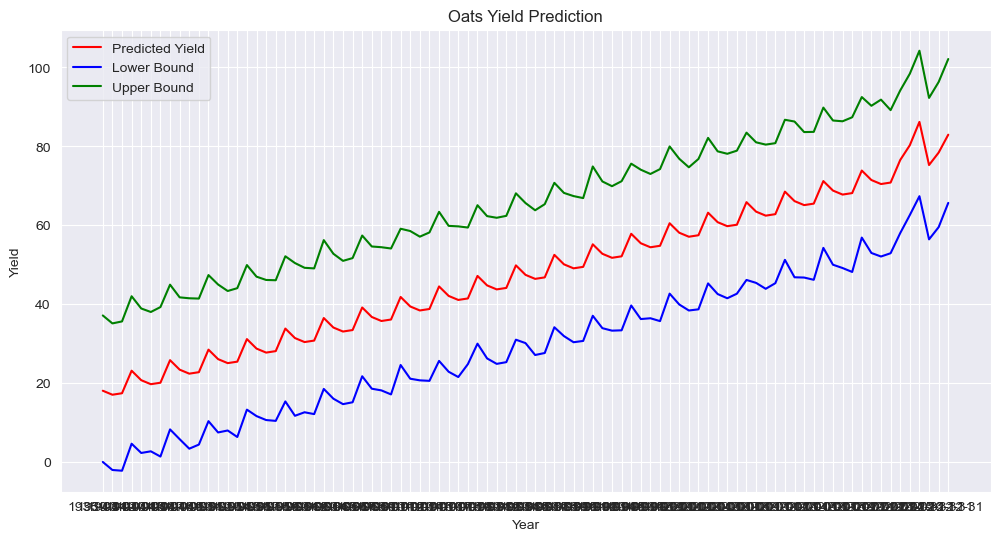

In [79]:
#plot df_oats_1 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['yhat'], color='red', label='Predicted Yield')
plt.plot(df['ds'], df['yhat_lower'], color='blue', label='Lower Bound')
plt.plot(df['ds'], df['yhat_upper'], color='green', label='Upper Bound')
plt.legend()
plt.title('Oats Yield Prediction')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.show()


In [84]:
def train_and_predict(column_name):
    df = prepare_data(column_name)
    model = Prophet()
    
    # Add the RM data as an additional regressor
    model.add_regressor('RM')
    
    model.fit(df)
    
    future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})
    future_RM = data[['Year', 'RM']].drop_duplicates().tail(5)
    future_RM['Year'] = pd.to_datetime(future_RM['Year'].astype(str), format='%Y')
    future_years['RM'] = future_RM['RM'].values
    
    df['ds'] = pd.to_datetime(df['ds'].astype(str), format='%Y')
    
    future = pd.concat([df[['ds', 'RM']], future_years], ignore_index=True)
    
    forecast = model.predict(future)
    return forecast, model


14:39:03 - cmdstanpy - INFO - Chain [1] start processing
14:39:03 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jason\AppData\Local\Temp\ipykernel_4336\4043581984.py:10: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_years = pd.DataFrame({'ds': pd.date_range(start='2022', end='2027', freq='Y', closed='right')})


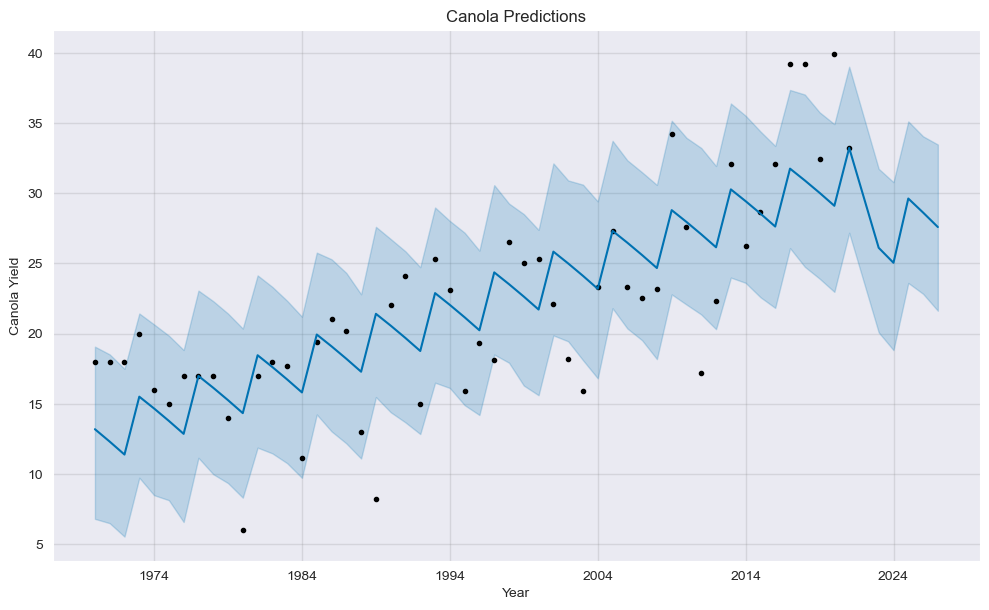

In [85]:
import matplotlib.pyplot as plt

# Get Canola predictions and the fitted model
canola_forecast, canola_model = train_and_predict("Canola")

# Plot the predictions
fig = canola_model.plot(canola_forecast)
plt.xlabel('Year')
plt.ylabel('Canola Yield')
plt.title('Canola Predictions')
plt.show()
